# Crosstab Analysis on Flight Data

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

In [40]:
df = pd.read_csv('flight.csv')
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162044,2014,9,30,2357.0,-2.0,545.0,-20.0,UA,N477UA,479,PDX,IAH,210.0,1825,23.0,57.0
162045,2014,9,30,2359.0,4.0,734.0,-1.0,DL,N137DL,1929,SEA,ATL,244.0,2182,23.0,59.0
162046,2014,9,30,NaN,NaN,NaN,NaN,AS,N530AS,470,SEA,SAN,NaN,1050,NaN,NaN
162047,2014,9,30,NaN,NaN,NaN,NaN,US,NaN,494,PDX,PHX,NaN,1009,NaN,NaN


# Simple Crosstab

### Flights crosstab to see sum of each carrier for each origin
### How to Read : There are 2187 flights from 'AA' Carrier with 'PDX' origin

In [41]:
ct = pd.crosstab(df.origin, df.carrier)
ct

carrier,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
origin,,,,,,,,,,,
PDX,2187,12844,1287,5168,1362,365,9841,6061,2361,666,11193
SEA,5399,49616,2253,11548,1336,730,8869,10610,3585,2606,12162


# Crosstab With Total Value

### Total of each rows and columns
### How to Read : 'PDX' origin have a total of 53,335 flights from all carrier

In [42]:
ct = pd.crosstab(df.origin, df.carrier,
                margins=True, margins_name='Total')
ct

carrier,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN,Total
origin,,,,,,,,,,,,
PDX,2187,12844,1287,5168,1362,365,9841,6061,2361,666,11193,53335
SEA,5399,49616,2253,11548,1336,730,8869,10610,3585,2606,12162,108714
Total,7586,62460,3540,16716,2698,1095,18710,16671,5946,3272,23355,162049


# Crosstab With Mean Value From Another Column

### Average distance of flights by every carrier and origin (km)
### How to Read : flights with 'PDX' origin and 'AA' carrier have an average distance of 1653.6 km

In [43]:
ct = pd.crosstab(df.origin, df.carrier,
                values=df.distance, aggfunc='mean').round(1)
ct

carrier,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
origin,,,,,,,,,,,
PDX,1653.6,1175.6,1450.2,1504.0,1010.5,2603.0,540.3,1378.3,1264.9,550.0,816.3
SEA,1798.9,1223.3,1840.6,1599.5,1049.4,2658.5,690.3,1453.0,1695.6,812.4,1007.1


# Crosstab With Percentage of Time Each Combination Occurs

### How to Read :  1.3% of flights came from 'PDX' origin with 'AA' carrier

In [44]:
ct = pd.crosstab(df.origin, df.carrier,normalize=True).round(3)
ct

carrier,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
origin,,,,,,,,,,,
PDX,0.013,0.079,0.008,0.032,0.008,0.002,0.061,0.037,0.015,0.004,0.069
SEA,0.033,0.306,0.014,0.071,0.008,0.005,0.055,0.065,0.022,0.016,0.075


# Crosstab to see how the columns are distributed in the table

### How to Read : 28.8% flights with 'AA' Carrier came from 'PDX' origin

In [45]:
ct = pd.crosstab(df.origin, df.carrier,normalize='columns').round(3)
ct

carrier,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
origin,,,,,,,,,,,
PDX,0.288,0.206,0.364,0.309,0.505,0.333,0.526,0.364,0.397,0.204,0.479
SEA,0.712,0.794,0.636,0.691,0.495,0.667,0.474,0.636,0.603,0.796,0.521


# Crosstab to see how the index are distributed in the table

### How to Read : 4.1% flights with 'PDX' origin came from 'AA' Carrier 

In [46]:
ct = pd.crosstab(df.origin, df.carrier,normalize='index').round(3)
ct

carrier,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
origin,,,,,,,,,,,
PDX,0.041,0.241,0.024,0.097,0.026,0.007,0.185,0.114,0.044,0.012,0.210
SEA,0.050,0.456,0.021,0.106,0.012,0.007,0.082,0.098,0.033,0.024,0.112


# Complex Crosstab

## Simple crosstab sum of origin for each months

In [58]:
ct = pd.crosstab(df.origin,df.month)
ct

month,1,2,3,4,5,6,7,8,9,10,11,12
origin,,,,,,,,,,,,
PDX,4375,3861,4653,4613,4822,4825,5057,5077,4188,4143,3822,3899
SEA,7780,7028,8270,8435,9213,10141,10746,10982,9316,9234,8584,8985


## Crosstab sum of [carrier from each origin] for each months
### How to Read : There are 186 flights of 'AA' Carrier from 'PDX' Origin in January

In [59]:
ct = pd.crosstab([df.origin, df.carrier],df.month)
ct

month             1     2     3     4     5     6     7     8     9     10  \
origin carrier                                                               
PDX    AA        186   168   186   180   204   209   214   215   206   171   
       AS       1015   916  1107  1082  1047  1070  1113  1138  1033  1078   
       B6         88    72    80    85   115   129   182   181    95    91   
       DL        380   318   421   427   451   501   563   544   400   402   
       F9        112    96   114   109   136   132   138   137   123   113   
       HA         31    28    31    30    31    30    31    31    30    31   
       OO       1016   919  1103  1013  1095   814   797   942   572   540   
       UA        460   382   425   490   522   573   589   582   568   572   
       US        174   152   190   205   222   236   245   230   196   183   
       VX         87    76    85    86    89    61    31    31    30    31   
       WN        826   734   911   906   910  1070  1154  1046   935   931   
SEA    AA        395   356   393   412   470   515   579   542   460   460   
       AS       3671  3375  3896  3908  4153  4441  4672  4801  4213  4204   
       B6        141   131   150   145   219   266   274   274   204   171   
       DL        697   615   722   752   851  1112  1208  1450  1146  1116   
       F9        104    90   103   103   140   134   138   133   118   116   
       HA         62    56    62    60    62    60    62    62    60    62   
       OO        748   702   798   735   736   673   695   798   661   684   
       UA        717   626   780   874  1000  1022  1077  1041   916   934   
       US        252   214   265   265   354   412   400   393   304   252   
       VX        208   176   192   216   231   227   233   231   217   227   
       WN        785   687   909   965   997  1279  1408  1257  1017  1008   

month             11    12  
origin carrier              
PDX    AA        125   123  
       AS       1122  1123  
       B6         81    88  
       DL        353   408  
       F9         84    68  
       HA         30    31  
       OO        524   506  
       UA        447   451  
       US        159   169  
       VX         29    30  
       WN        868   902  
SEA    AA        402   415  
       AS       4023  4259  
       B6        135   143  
       DL        953   926  
       F9         86    71  
       HA         60    62  
       OO        786   853  
       UA        795   828  
       US        222   252  
       VX        219   229  
       WN        903   947

## Crosstab sum of [carrier from each origin] for [everyday from each months]
### How to Read : There are 6 flights of 'AA' Carrier from 'PDX' Origin in 1st January

In [63]:
ct = pd.crosstab([df.origin, df.carrier],[df.month, df.day],
                rownames=['Origin', 'Carrier'],
                colnames=['Month', 'Day'])
ct

Month            1                                                ...   12  \
Day              1    2    3    4    5    6    7    8    9    10  ...   22   
Origin Carrier                                                    ...        
PDX    AA         6    6    6    6    6    6    6    6    6    6  ...    4   
       AS        36   36   37   36   36   34   29   33   33   34  ...   39   
       B6         4    4    4    4    4    4    2    2    3    3  ...    3   
       DL        10   17   17   17   17   16   10   10   13   13  ...   16   
       F9         4    4    4    4    4    4    3    3    4    4  ...    3   
       HA         1    1    1    1    1    1    1    1    1    1  ...    1   
       OO        31   34   34   31   35   32   33   34   34   34  ...   18   
       UA        20   21   21   19   18   21   13   14   14   14  ...   16   
       US         8    7    7    7    7    6    4    5    6    6  ...    7   
       VX         3    3    3    3    3    3    3    3    3    3  ...    1   
       WN        26   32   31   26   27   32   28   28   28   28  ...   31   
SEA    AA        13   13   13   11   13   13   13   13   13   13  ...   14   
       AS       127  130  131  123  121  121  115  118  121  122  ...  147   
       B6         5    5    5    4    5    5    4    4    5    5  ...    5   
       DL        19   28   28   25   28   24   20   20   24   25  ...   36   
       F9         4    4    4    4    4    4    3    3    4    3  ...    3   
       HA         2    2    2    2    2    2    2    2    2    2  ...    2   
       OO        20   24   24   20   24   26   25   25   25   25  ...   32   
       UA        34   35   34   35   35   35   21   19   22   22  ...   32   
       US        12   12   12   12   12   11    6    7    8    8  ...   10   
       VX         8    8    8    8    8    8    8    6    7    7  ...    8   
       WN        26   31   31   25   27   31   26   26   26   26  ...   32   

Month                                                        
Day              23   24   25   26   27   28   29   30   31  
Origin Carrier                                               
PDX    AA         4    4    4    4    4    4    4    4    5  
       AS        35   31   32   38   37   40   40   39   37  
       B6         3    3    3    3    3    3    3    3    3  
       DL        16   11   11   17   17   17   16   16   11  
       F9         2    3    2    3    1    2    3    2    3  
       HA         1    1    1    1    1    1    1    1    1  
       OO        17   14   13   18   16   17   18   17   14  
       UA        16   11   14   17   14   14   16   16   11  
       US         7    6    6    7    5    7    7    7    5  
       VX         1    1    0    1    1    1    1    1    1  
       WN        31   23   23   31   29   29   31   31   22  
SEA    AA        14   12   14   14   14   14   14   14   14  
       AS       147  143  136  149  137  143  147  147  141  
       B6         5    5    4    5    4    5    5    5    5  
       DL        37   25   25   37   34   37   36   37   25  
       F9         3    3    3    1    3    2    3    3    3  
       HA         2    2    2    2    2    2    2    2    2  
       OO        32   27   23   32   33   34   32   33   24  
       UA        31   21   23   34   24   25   32   31   21  
       US        10    8    8   10    9   10   10    9    9  
       VX         8    6    6    8    7    7    8    8    7  
       WN        32   27   25   32   32   32   32   32   26  

[22 rows x 365 columns]

## SNS Heatmap Visualization for Crosstab

### How to Read : Most flights are obtained by 'AA' carrier from origin 'SEA' with over 40000 flights

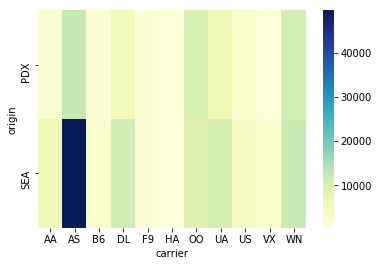

In [79]:
sns.heatmap(pd.crosstab(df.origin, df.carrier), cmap='YlGnBu', annot=False, cbar=True)